In [44]:
#% pip install openpyxl
import os, re, configparser
import pandas as pd
import numpy as np
from globals import glob
from utilities_database import prepare_data, prepare_database, consult_database, clear_databases, retrieve_data, rename_index, get_date, get_sigma, rename_limits_table
from utilities_analysis import mean_calculator, limits_generator, ini_generator, RyR, z_score_filter, reset_df
from utilities_plotting import plot_scatter, plot_capability
import _db_tools as db

In [45]:
##Data extraction
table_names = ['TOP_PASSAT_B9_measurements_2023y_12m_13d_14h_49m_51s', 'TOP_PASSAT_B9_limits_2023y_12m_13d_14h_49m_51s']
MEAS = retrieve_data("input.db", table_names[0])
LIMITS = retrieve_data("input.db", table_names[1])

Table *TOP_PASSAT_B9_measurements_2023y_12m_13d_14h_49m_51s* retrieved succesfully.
Table *TOP_PASSAT_B9_limits_2023y_12m_13d_14h_49m_51s* retrieved succesfully.


RyR calculation

In [46]:
##RyR dataframe generation
RyR_df = RyR(pd.concat([MEAS, LIMITS], axis=1))
RyR_df_format = rename_index(RyR_df)
print("RyR")
RyR_df_format

RyR


,RyR,Status
Guia_Luz_Blanco_FB1_X,15.491617,Low fail
Guia_Luz_Blanco_FB1_Y,14.632554,Low fail
Guia_Luz_Blanco_FB2_X,24.763172,Low fail
Guia_Luz_Blanco_FB2_Y,13.192028,Low fail
Guia_Luz_Blanco_FB3_X,14.374978,Low fail
Guia_Luz_Blanco_FB3_Y,26.363133,High fail
Guia_Luz_Blanco_FB4_X,13.450681,Low fail
Guia_Luz_Blanco_FB4_Y,10.295877,Low fail
Guia_Luz_Blanco_FB5_X,28.283117,High fail
Guia_Luz_Blanco_FB5_Y,14.691641,Low fail


Distribution Fitting

Z-score filtering of outliers

![title](../media/Z-score.jpg)

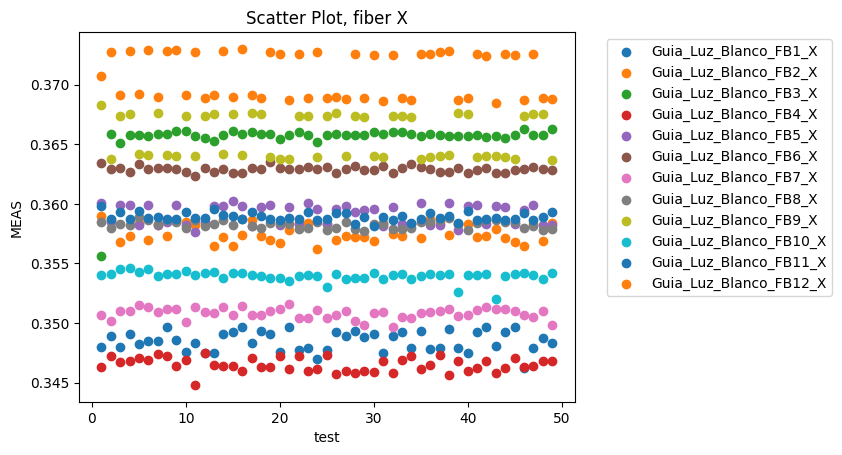

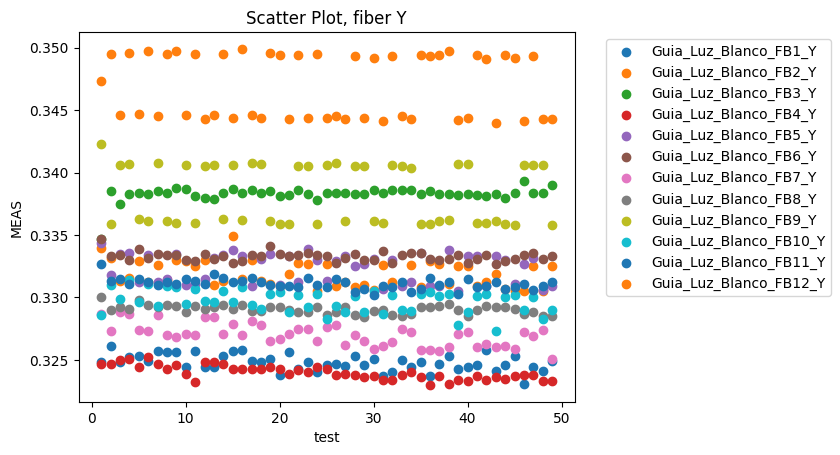

In [47]:
##Filtered data visualization
z_df = z_score_filter(pd.concat([MEAS, LIMITS], axis=1), 1000) #Huge numbers to disable
plot_scatter(z_df.iloc[:, :-2], 'Scatter Plot, fiber X', 'test', 'MEAS', filter='x')
plot_scatter(z_df.iloc[:, :-2], 'Scatter Plot, fiber Y', 'test', 'MEAS', filter='y')

In [48]:
##Filtered data review
z_df_format = rename_index(z_df)
z_df_format.columns = [f"Test: {i}" for i in range(1, z_df_format.shape[1]-1)] + ["LSL", "USL"]
z_df_format

,Test: 1,Test: 2,Test: 3,Test: 4,Test: 5,Test: 6,Test: 7,Test: 8,Test: 9,Test: 10,...,Test: 42,Test: 43,Test: 44,Test: 45,Test: 46,Test: 47,Test: 48,Test: 49,LSL,USL
Guia_Luz_Blanco_FB1_X,0.3248,0.3261,0.3248,0.3252,0.3253,0.3249,0.3257,0.3256,0.3256,0.3244,...,0.3258,0.3241,0.3246,0.3253,0.3231,0.3244,0.3241,0.3249,0.3140,0.3390
Guia_Luz_Blanco_FB1_Y,0.3480,0.3489,0.3480,0.3491,0.3482,0.3485,0.3485,0.3497,0.3486,0.3476,...,0.3497,0.3481,0.3492,0.3497,0.3462,0.3479,0.3487,0.3483,0.3453,0.3789
Guia_Luz_Blanco_FB2_X,0.3340,0.3332,0.3313,0.3316,0.3329,0.3312,0.3326,0.3314,0.3330,0.3329,...,0.3312,0.3319,0.3307,0.3305,0.3305,0.3325,0.3305,0.3325,0.3230,0.3480
Guia_Luz_Blanco_FB2_Y,0.3590,0.3586,0.3568,0.3573,0.3584,0.3570,0.3582,0.3573,0.3586,0.3585,...,0.3573,0.3579,0.3571,0.3568,0.3565,0.3583,0.3569,0.3584,0.3453,0.3789
Guia_Luz_Blanco_FB3_X,0.3347,0.3385,0.3375,0.3383,0.3384,0.3383,0.3385,0.3384,0.3388,0.3387,...,0.3381,0.3383,0.3380,0.3384,0.3393,0.3384,0.3384,0.3390,0.3180,0.3430
Guia_Luz_Blanco_FB3_Y,0.3556,0.3659,0.3651,0.3658,0.3658,0.3657,0.3659,0.3659,0.3661,0.3661,...,0.3656,0.3657,0.3655,0.3658,0.3663,0.3658,0.3658,0.3663,0.3453,0.3789
Guia_Luz_Blanco_FB4_X,0.3247,0.3247,0.3250,0.3251,0.3244,0.3252,0.3247,0.3243,0.3246,0.3239,...,0.3234,0.3236,0.3235,0.3237,0.3238,0.3238,0.3233,0.3233,0.3140,0.3390
Guia_Luz_Blanco_FB4_Y,0.3463,0.3472,0.3467,0.3468,0.3471,0.3469,0.3474,0.3472,0.3464,0.3469,...,0.3468,0.3458,0.3462,0.3471,0.3463,0.3464,0.3468,0.3468,0.3453,0.3789
Guia_Luz_Blanco_FB5_X,0.3344,0.3318,0.3335,0.3336,0.3312,0.3334,0.3312,0.3315,0.3335,0.3310,...,0.3309,0.3333,0.3330,0.3311,0.3327,0.3332,0.3306,0.3309,0.3230,0.3480
Guia_Luz_Blanco_FB5_Y,0.3601,0.3585,0.3599,0.3599,0.3582,0.3599,0.3582,0.3585,0.3599,0.3582,...,0.3583,0.3598,0.3597,0.3583,0.3595,0.3599,0.3582,0.3582,0.3453,0.3789


In [49]:
##Filtered RyR generation
RyR_df = RyR(z_df)
RyR_df_format = rename_index(RyR_df)
print("RyR filtered")
RyR_df_format

RyR filtered


,RyR,Status
Guia_Luz_Blanco_FB1_X,15.491617,Low fail
Guia_Luz_Blanco_FB1_Y,14.632554,Low fail
Guia_Luz_Blanco_FB2_X,24.763172,Low fail
Guia_Luz_Blanco_FB2_Y,13.192028,Low fail
Guia_Luz_Blanco_FB3_X,14.374978,Low fail
Guia_Luz_Blanco_FB3_Y,26.363133,High fail
Guia_Luz_Blanco_FB4_X,13.450681,Low fail
Guia_Luz_Blanco_FB4_Y,10.295877,Low fail
Guia_Luz_Blanco_FB5_X,28.283117,High fail
Guia_Luz_Blanco_FB5_Y,14.691641,Low fail


In [50]:
##Database generation
name = re.sub(r'\W', '_', glob.tooling + "_" + get_date()) + "_measurements&filtered"
confirmation = input("Do you want to export the new limits to your database (y/n): ").strip().lower()
if confirmation == 'y':
    prepare_database("output.db", RyR_df_format, name) #Store a df for the limits inside the database of the project
    limits_file = rename_limits_table("output.db", name)
    consult_database("output.db")
else:
    print("Operation canceled.")

Operation canceled.
